In [1]:
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
mushroom = fetch_ucirepo(id=73) 
  
# data (as pandas dataframes) 
X = mushroom.data.features 
y = mushroom.data.targets 
  
# metadata 
print(mushroom.metadata) 
  
# variable information 
print(mushroom.variables) 

{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely po

In [3]:
#Creating DataFrame
df= pd.concat([X,y], axis=1)

In [4]:
#Display DataFrame
df

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,e
8120,x,s,n,f,n,a,c,b,y,e,...,o,o,p,n,o,p,b,v,l,e
8121,f,s,n,f,n,a,c,b,n,e,...,o,o,p,o,o,p,b,c,l,e
8122,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,p


In [5]:
#All the columns in DataFrame
df.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'poisonous'],
      dtype='object')

In [6]:
#Variable from UCI
c_shape= {"b":"bell","c":"conical","x":"convex","f":"flat","k":"knobbed","s":"sunken"}
c_surface= {"f":"fibrous", "g": "grooves", "y":"scaly,", "s":"smooth"}
c_color= {"n":"brown","b":"buff","c":"cinnamon","g":"gray","r":"green","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}
bruises= {"t": "bruises", "f": "no bruises"}
odor= {"a":"almond","l":"anise","c":"creosote","y":"fishy","f":"foul","m":"musty","n":"none","p":"pungent","s":"spicy"}
gill_attach ={"a":"attached","f":"free", "d": "descending", "n":"notched"}
gill_spacing={"c":"close","w":"crowded"}
gill_size={"b":"broad","n":"narrow"}
gill_color={"k":"black","b":"buff","n":"brown","h":"chocolate","g":"gray","r":"green","o":"orange","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}
stalk_shape={"t":"tapering","e":"enlarging"}
stalk_root={"b":"bulbous","c":"club","e":"equal","z":"rhizomorphs","r":"rooted","?":"missing"}
stalk_surface_above={"s":"smooth","k":"silky","f":"fibrous","y":"scaly"}
stalk_surfave_below= {"f":"fibrous","y":"scaly", "k":"silky", "s": "smooth"}
stalk_color_above={"n":"brown","b":"buff","c":"cinnamon","g":"gray","p":"pink","e":"red","w":"white","y":"yellow","o":"orange"}
stalk_color_below={"n":"brown","b":"buff","c":"cinnamon","g":"gray","p":"pink","e":"red","w":"white","y":"yellow","o":"orange"}
veil_type={"p":"partial","u":"universal"} 
viel_color= {"n": "brown", "o":"orange", "w": "white","y": "yellow"}
ring_number= {"n":"none","o":"one","t":"two"}
ring_type={"c":"cobwebby","e":"evanescent","f":"flaring","l":"large","n":"none","p":"pendant","s":"sheathing","z":"zone"}
spore_print_color= {"k":"black","n":"brown","b":"buff","h":"chocolate","r":"green","o":"orange","u":"purple","w":"white","y":"yellow"}
population={"a":"abundant","c":"clustered","n":"numerous","s":"scattered","v":"several","y":"solitary"}
habitat={"g":"grasses","l":"leaves","m":"meadows","p":"paths","u":"urban","w":"waste","d":"woods"}
poisonous= {"e":"edible", "p":"poisonous"}



In [7]:
#Replacing all the variables

df["cap-shape"]= df["cap-shape"].replace(c_shape)
df["cap-surface"] = df["cap-surface"].replace(c_surface) 
df["cap-color"]=df["cap-color"].replace(c_color)
df["bruises"]=df["bruises"].replace(bruises)
df["odor"]= df["odor"].replace(odor)
df["gill-attachment"]=df["gill-attachment"].replace(gill_attach)
df["gill-spacing"]=df["gill-spacing"].replace(gill_spacing)
df["gill-size"]=df["gill-size"].replace(gill_size)
df["gill-color"]=df["gill-color"].replace(gill_color)
df["stalk-shape"]=df["stalk-shape"].replace(stalk_shape)
df["stalk-root"]=df["stalk-root"].replace(stalk_root)
df["stalk-surface-above-ring"]=df["stalk-surface-above-ring"].replace(stalk_surface_above)
df["stalk-color-below-ring"]=df["stalk-color-below-ring"].replace(stalk_color_below)
df["stalk-surface-below-ring"]=df["stalk-surface-below-ring"].replace(stalk_surfave_below)
df["stalk-color-above-ring"]=df["stalk-color-above-ring"].replace(stalk_color_above)
df["veil-type"]=df["veil-type"].replace(veil_type)
df["veil-color"]=df["veil-color"].replace(viel_color)
df["ring-number"]=df["ring-number"].replace(ring_number)
df["ring-type"]= df["ring-type"].replace(ring_type)
df["spore-print-color"]=df["spore-print-color"].replace(spore_print_color)
df["population"]=df["population"].replace(population)
df["habitat"]= df["habitat"].replace(habitat)
df["poisonous"]= df["poisonous"].replace(poisonous)
df.head()
df.tail()



,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
8119,knobbed,smooth,brown,no bruises,none,attached,close,broad,yellow,enlarging,...,orange,orange,partial,orange,one,pendant,buff,clustered,leaves,edible
8120,convex,smooth,brown,no bruises,none,attached,close,broad,yellow,enlarging,...,orange,orange,partial,brown,one,pendant,buff,several,leaves,edible
8121,flat,smooth,brown,no bruises,none,attached,close,broad,brown,enlarging,...,orange,orange,partial,orange,one,pendant,buff,clustered,leaves,edible
8122,knobbed,"scaly,",brown,no bruises,fishy,free,close,narrow,buff,tapering,...,white,white,partial,white,one,evanescent,white,several,leaves,poisonous
8123,convex,smooth,brown,no bruises,none,attached,close,broad,yellow,enlarging,...,orange,orange,partial,orange,one,pendant,orange,clustered,leaves,edible


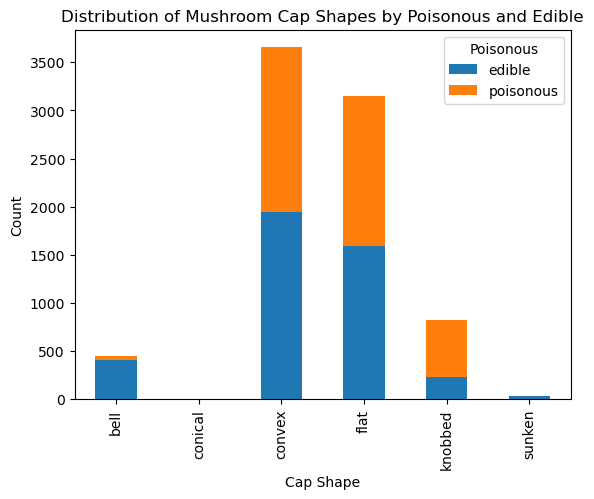

In [307]:
#Plotting Indvidual Categories 
counts = df.groupby(['cap-shape', 'poisonous']).size().unstack()

# Plotting
ax = counts.plot(kind='bar', stacked=True)  
plt.xlabel('Cap Shape')
plt.ylabel('Count')
plt.title('Distribution of Mushroom Cap Shapes by Poisonous and Edible')
plt.legend(title='Poisonous')
plt.show()

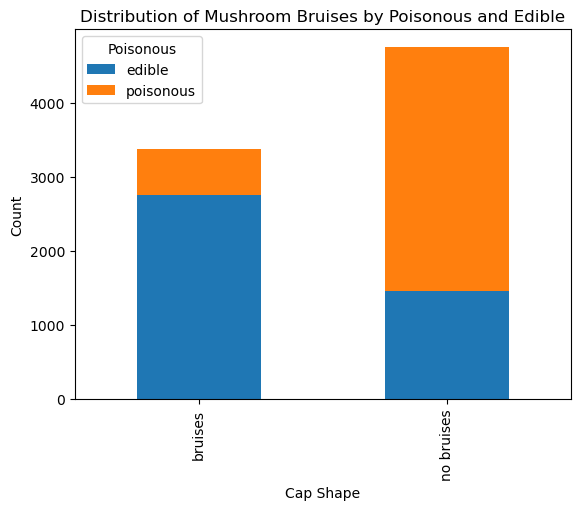

In [308]:
counts2 = df.groupby(['bruises', 'poisonous']).size().unstack()

# Plotting
ax = counts2.plot(kind='bar', stacked=True)  
plt.xlabel('Cap Shape')
plt.ylabel('Count')
plt.title('Distribution of Mushroom Bruises by Poisonous and Edible')
plt.legend(title='Poisonous')
plt.show()

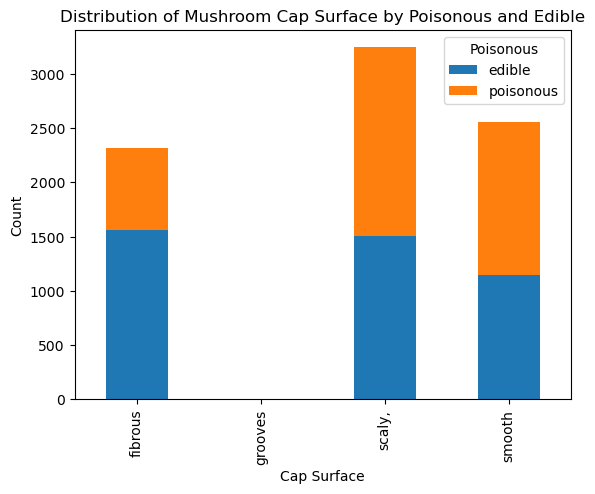

In [309]:
counts3 = df.groupby(['cap-surface', 'poisonous']).size().unstack()

# Plotting
ax = counts3.plot(kind='bar', stacked=True)  
plt.xlabel('Cap Surface')
plt.ylabel('Count')
plt.title('Distribution of Mushroom Cap Surface by Poisonous and Edible')
plt.legend(title='Poisonous')
plt.show()

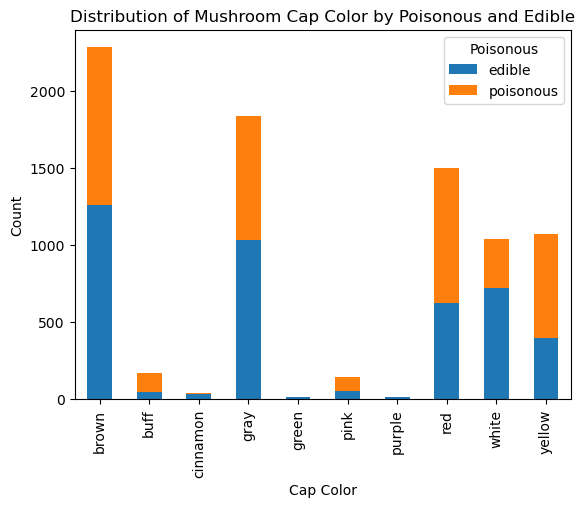

In [310]:
counts8 = df.groupby(['cap-color', 'poisonous']).size().unstack()

# Plotting
ax = counts8.plot(kind='bar', stacked=True)  
plt.xlabel('Cap Color')
plt.ylabel('Count')
plt.title('Distribution of Mushroom Cap Color by Poisonous and Edible')
plt.legend(title='Poisonous')
plt.show()

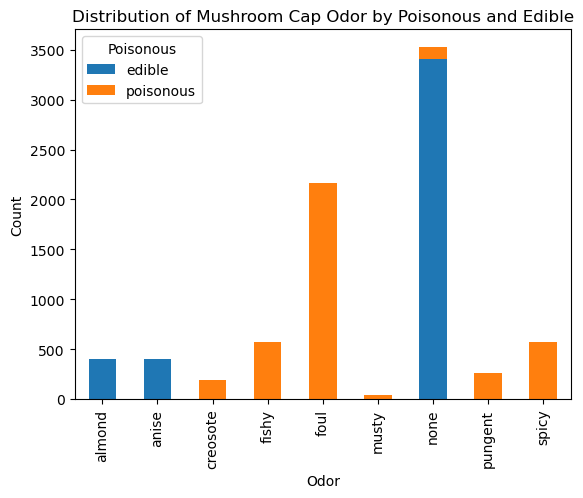

In [311]:
counts9 = df.groupby(['odor', 'poisonous']).size().unstack()

# Plotting
ax = counts9.plot(kind='bar', stacked=True)  
plt.xlabel('Odor')
plt.ylabel('Count')
plt.title('Distribution of Mushroom Cap Odor by Poisonous and Edible')
plt.legend(title='Poisonous')
plt.show()

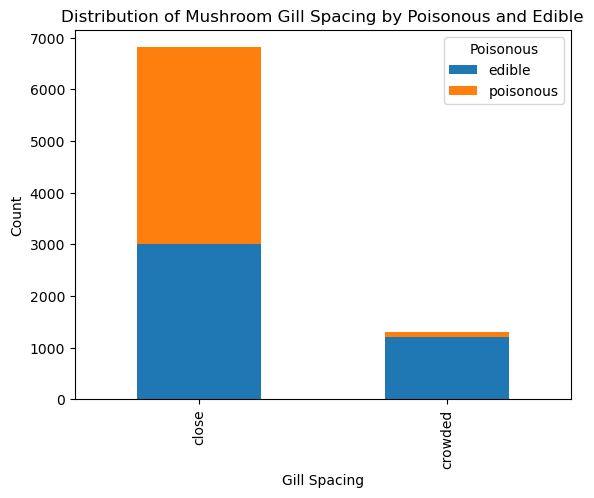

In [312]:
counts10 = df.groupby(['gill-spacing', 'poisonous']).size().unstack()

# Plotting
ax = counts10.plot(kind='bar', stacked=True)  
plt.xlabel('Gill Spacing')
plt.ylabel('Count')
plt.title('Distribution of Mushroom Gill Spacing by Poisonous and Edible')
plt.legend(title='Poisonous')
plt.show()

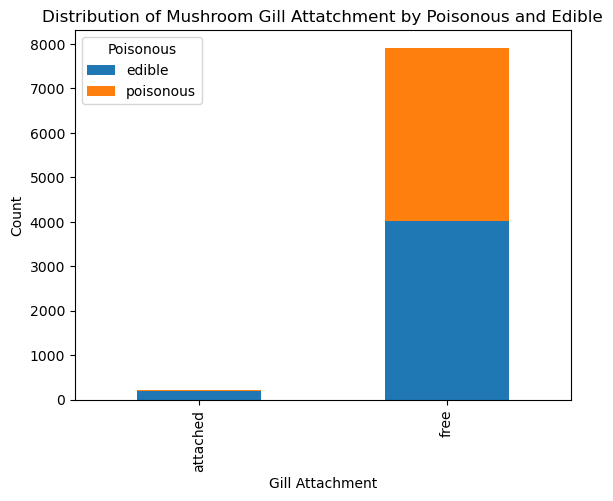

In [313]:
counts11 = df.groupby(['gill-attachment', 'poisonous']).size().unstack()

# Plotting
ax = counts11.plot(kind='bar', stacked=True)  
plt.xlabel('Gill Attachment')
plt.ylabel('Count')
plt.title('Distribution of Mushroom Gill Attatchment by Poisonous and Edible')
plt.legend(title='Poisonous')
plt.show()

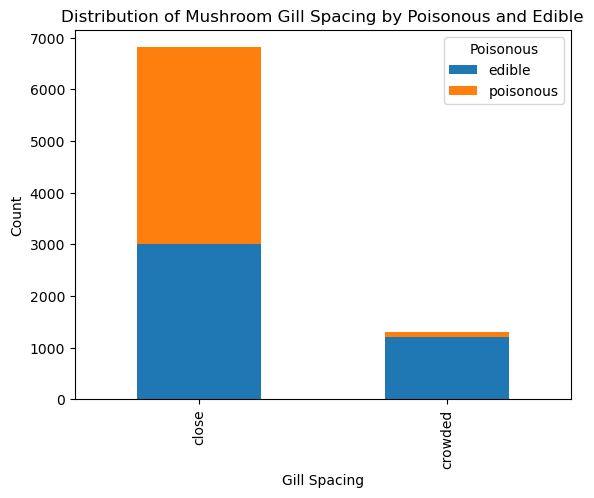

In [314]:
counts4 = df.groupby(['gill-spacing', 'poisonous']).size().unstack()

# Plotting
ax = counts4.plot(kind='bar', stacked=True)  
plt.xlabel('Gill Spacing')
plt.ylabel('Count')
plt.title('Distribution of Mushroom Gill Spacing by Poisonous and Edible')
plt.legend(title='Poisonous')
plt.show()

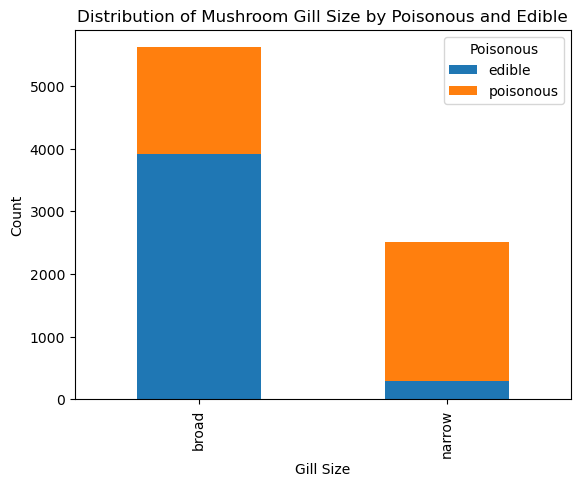

In [315]:
counts5 = df.groupby(['gill-size', 'poisonous']).size().unstack()

# Plotting
ax = counts5.plot(kind='bar', stacked=True)  
plt.xlabel('Gill Size')
plt.ylabel('Count')
plt.title('Distribution of Mushroom Gill Size by Poisonous and Edible')
plt.legend(title='Poisonous')
plt.show()

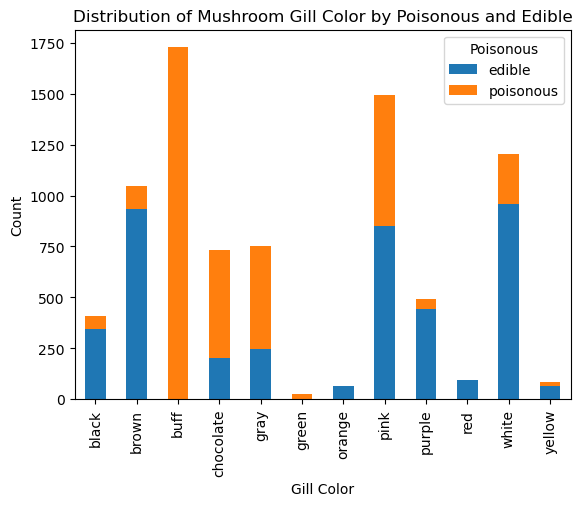

In [316]:
counts6 = df.groupby(['gill-color', 'poisonous']).size().unstack()

# Plotting
ax = counts6.plot(kind='bar', stacked=True)  
plt.xlabel('Gill Color')
plt.ylabel('Count')
plt.title('Distribution of Mushroom Gill Color by Poisonous and Edible')
plt.legend(title='Poisonous')
plt.show()

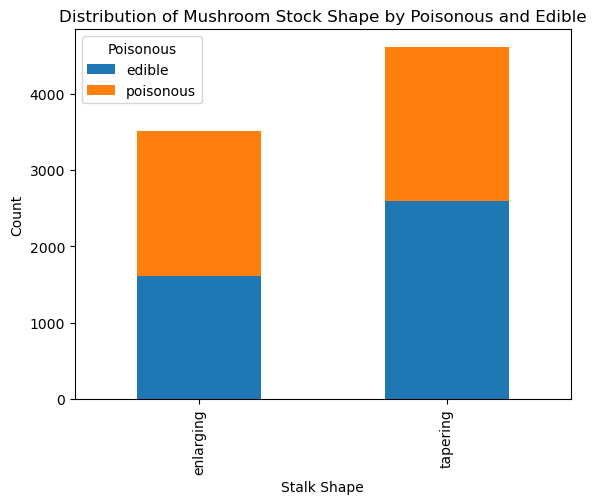

In [318]:
counts7 = df.groupby(['stalk-shape', 'poisonous']).size().unstack()

# Plotting
ax = counts7.plot(kind='bar', stacked=True)  
plt.xlabel('Stalk Shape')
plt.ylabel('Count')
plt.title('Distribution of Mushroom Stock Shape by Poisonous and Edible')
plt.legend(title='Poisonous')
plt.show()

In [ ]:
'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'poisonous'],
      dtype='object')

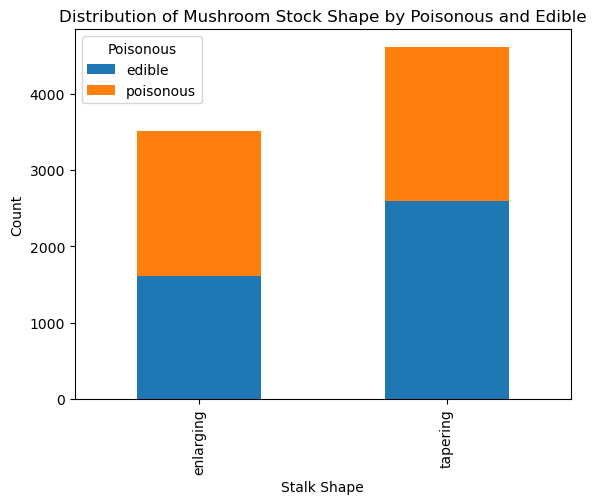

In [319]:
counts12 = df.groupby(['stalk-shape', 'poisonous']).size().unstack()

# Plotting
ax = counts12.plot(kind='bar', stacked=True)  
plt.xlabel('Stalk Shape')
plt.ylabel('Count')
plt.title('Distribution of Mushroom Stock Shape by Poisonous and Edible')
plt.legend(title='Poisonous')
plt.show()

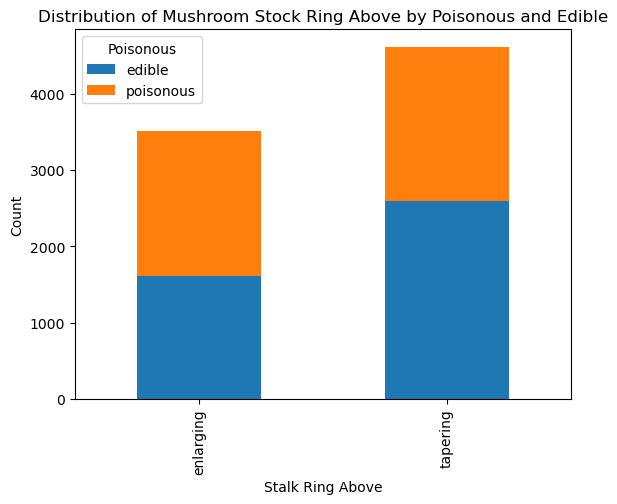

In [320]:
counts13 = df.groupby(['stalk-surface-above-ring', 'poisonous']).size().unstack()

# Plotting
ax = counts12.plot(kind='bar', stacked=True)  
plt.xlabel('Stalk Ring Above')
plt.ylabel('Count')
plt.title('Distribution of Mushroom Stock Ring Above by Poisonous and Edible')
plt.legend(title='Poisonous')
plt.show()

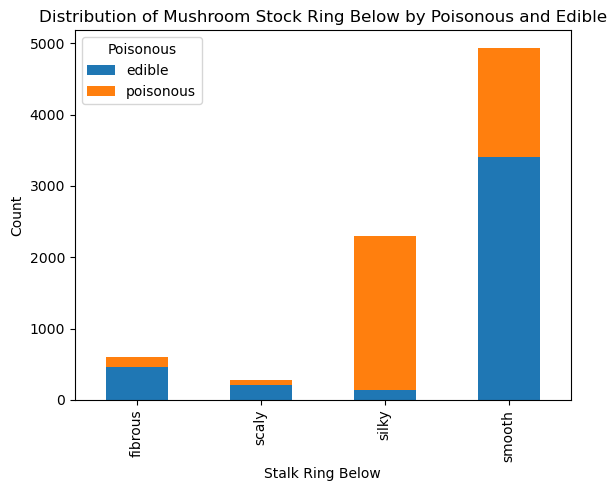

In [321]:
counts14 = df.groupby(['stalk-surface-below-ring', 'poisonous']).size().unstack()

# Plotting
ax = counts14.plot(kind='bar', stacked=True)  
plt.xlabel('Stalk Ring Below')
plt.ylabel('Count')
plt.title('Distribution of Mushroom Stock Ring Below by Poisonous and Edible')
plt.legend(title='Poisonous')
plt.show()

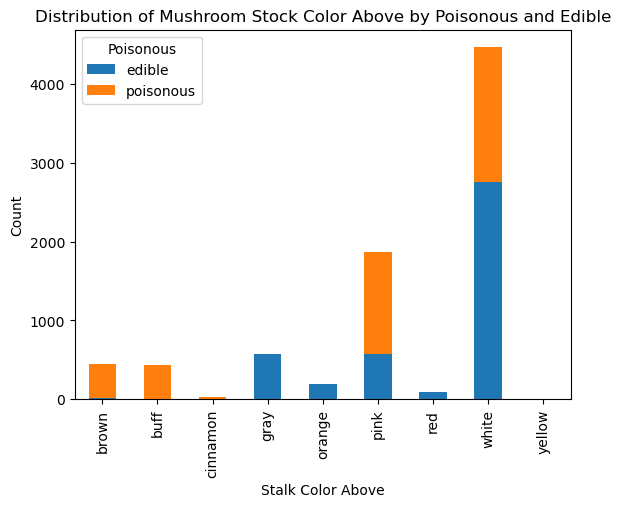

In [322]:
counts15 = df.groupby(['stalk-color-above-ring', 'poisonous']).size().unstack()

# Plotting
ax = counts15.plot(kind='bar', stacked=True)  
plt.xlabel('Stalk Color Above')
plt.ylabel('Count')
plt.title('Distribution of Mushroom Stock Color Above by Poisonous and Edible')
plt.legend(title='Poisonous')
plt.show()